## Predict Diabetes



## Import libraries

In [2]:
import pandas as pd                     # Dataframe library
import matplotlib.pyplot as plt         # plots data
import numpy as np                      # N- Dim object support


# Do inline plot instead of on another window
%matplotlib inline



## Load and Review data



In [3]:
df = pd.read_csv("./data/pima-data.csv")


In [4]:
df.shape

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


## Definition of features

From the metadata on the data source we have the following definition of the features.

|Feature | Description | Comments|
|---------|------------|----------|
|num_preg |	number of pregnancies  |
|glucose_conc |	Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|diastolic_bp |Diastolic blood pressure (mm Hg) |
|thickness	| Triceps skin fold thickness (mm) |
|insulin	| 2-Hour serum insulin (mu U/ml) |
|bmi	| Body mass index (weight in kg/(height in m)^2) |
|diab_pred	| Diabetes pedigree function |
|Age (years) |	Age (years) |
|skin	| ????	| What is this? |
|diabetes	| Class variable (1=True, 0=False)| 	Why is our data boolean (True/False)? |

In [7]:
df.isnull().values.any()

False

In [8]:
def plot_corr(df, size=11):
    """Fuctions plots a graphical correlation matrix for each pair of column in the dataframe
    
    args:
        df: panda dataframe
        size: vertical and horizontal size of the plot
        
    results:
        matrix of correlation between columns
    
    """
    
    corr = df.corr()  #dataframe correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #color code rectangle by correlation values
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    

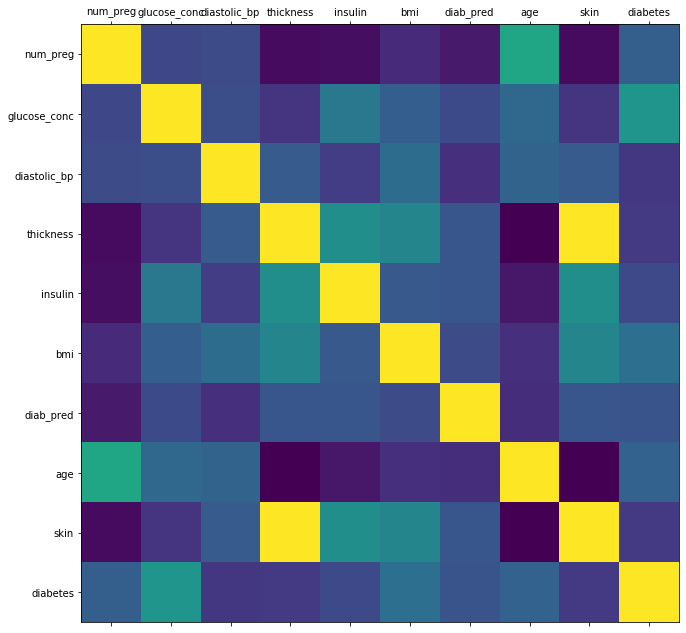

In [9]:
plot_corr(df)

In [12]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
del df['skin']

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


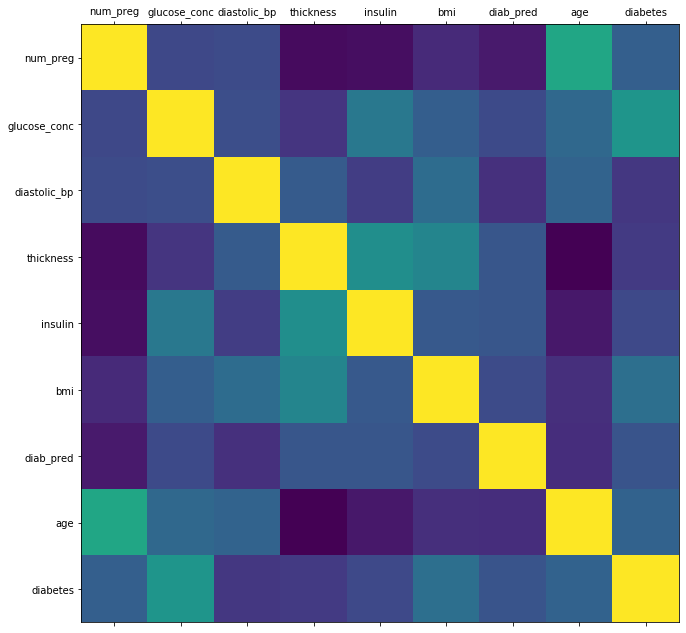

In [14]:
plot_corr(df)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [14]:
diabetes_map = {True: 1, False: 0}

In [15]:
df["diabetes"] = df["diabetes"].map(diabetes_map)

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check True to False ratio

In [17]:
num_true = len(df.loc[df['diabetes'] == True ])
num_false = len(df.loc[df['diabetes'] == False])

print(f"Number of True cases: {num_true} ({(num_true/(num_true+num_false) * 100):.2f}%)")
print(f"Number of False cases: {num_false} ({(num_false/(num_true+num_false) * 100):.2f}%)")


Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


## Spliting the data

*70% trainining, 30% test*

In [18]:
from sklearn.model_selection import train_test_split

feature_col_names = ["num_preg", "glucose_conc", "diastolic_bp", "thickness", "insulin", "bmi", "diab_pred", "age"]

predicted_class_name  = ["diabetes"]


X = df[feature_col_names].values  # Predictor feature columns (8 * m)
y = df[predicted_class_name].values   # pridicted class (1  = true, 0 = False) column (1 * m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  split_test_size, random_state=42)


 # we check to ensure desired 70% train, 30% test split data


In [19]:
print("{0:0.2f}% in training set".format(len(X_train)/len(df.index) * 100 ))
print("{0:0.2f}% in test set".format(len(X_test)/len(df.index) * 100 ))

69.92% in training set
30.08% in test set


### verifiying predicting data was split correctly



In [20]:
print("Original True: {0}  ({1:0.2f})".format(len(df.loc[df["diabetes"] == 1]), (len(df.loc[df["diabetes"] == 1]))/len(df.index) * 100))
print("Original False: {0}  ({1:0.2f})".format(len(df.loc[df["diabetes"] == 0]), (len(df.loc[df["diabetes"] == 0]))/len(df.index) * 100))
print("")    
print("Training True: {0}  ({1:0.2f})".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]))/len(y_train) * 100))
print("Training False: {0}  ({1:0.2f})".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]))/len(y_train) * 100))
print("") 
print("Test True: {0}  ({1:0.2f})".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]))/len(y_test) * 100))
print("Test False: {0}  ({1:0.2f})".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]))/len(y_test) * 100))
      

Original True: 268  (34.90)
Original False: 500  (65.10)

Training True: 188  (35.01)
Training False: 349  (64.99)

Test True: 80  (34.63)
Test False: 151  (65.37)


### post-split-data preparation

In [21]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print("# of rows in dataframe {}".format(len(df)))
print("# of rows missing glucose conc {}".format(len(df.loc[df["glucose_conc"] == 0])))
print("# of rows missing diastolic_bp {}".format(len(df.loc[df["diastolic_bp"] == 0])))
print("# of rows missing thickness {}".format(len(df.loc[df["thickness"] == 0])))
print("# of rows missing insulin {}".format(len(df.loc[df["insulin"] == 0])))
print("# of rows missing bmi {}".format(len(df.loc[df["bmi"] == 0])))
print("# of rows missing diab_pred {}".format(len(df.loc[df["diab_pred"] == 0])))
print("# of rows missing age {}".format(len(df.loc[df["age"] == 0])))

# of rows in dataframe 768
# of rows missing glucose conc 5
# of rows missing diastolic_bp 35
# of rows missing thickness 227
# of rows missing insulin 374
# of rows missing bmi 11
# of rows missing diab_pred 0
# of rows missing age 0


In [23]:
from sklearn.impute import SimpleImputer

# impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)


## Training initial Algorithm

In [24]:
from sklearn.naive_bayes import GaussianNB

# create a Naive Bayes Model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Perfomance on Training Data

In [25]:
# predict values using training data

nb_train_predict = nb_model.predict(X_train)

# import the perfomnace metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_train_predict)))
print("")


Accuracy: 0.7542



## Perfomance on Test Data

In [26]:
# predict values using training data

nb_test_predict = nb_model.predict(X_test)

# import the perfomnace metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_test_predict)))
print("")

Accuracy: 0.7359



## Metrics

In [27]:
print("Confusion Matrix")
print("{}".format(metrics.confusion_matrix(y_test, nb_test_predict)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_test_predict))


Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Predict Training Data

In [31]:
rf_train_predict = rf_model.predict(X_train)

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_train_predict)))
print("")

Accuracy: 1.0000



## Predict Test data

In [32]:
rf_test_predict = rf_model.predict(X_test)

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_test_predict)))
print("")

Accuracy: 0.7403



## Metrics

In [36]:
print("Confusion Matrix")
print("{}".format(metrics.confusion_matrix(y_test, rf_test_predict)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_test_predict))


Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.5, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("")


# metrics
print("Confusion Matrix")
print("{}".format(metrics.confusion_matrix(y_test, rf_test_predict)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_test_predict))


Accuracy: 0.7446

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



/home/gwako/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Set regurlarization param

1st max value of 0.613 occured at C=1.400


Text(0, 0.5, 'recall score')

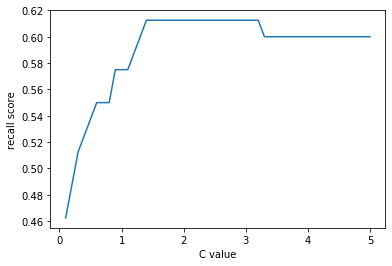

In [42]:

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

## Logisitic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

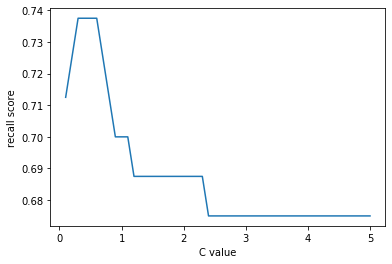

In [44]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [46]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


## Logistcic Regression CV

In [48]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)